Alla Terentieva

In this project, I analyzed a dataset of 199,999 records to develop a model predicting survival scenarios for COVID patients based on patients' background, current condition, and medical approaches.

The goal is to provide medical professionals with guidance on optimal decision-making regarding treatment locations and approaches. The model considers various factors, including age, sex, and specific health history, to offer valuable insights for medical decision support.

**Data Exploration and Visualization:**

* Explored and understood the dataset.
* Visualized key features and their distributions.
* Identified patterns, trends, and potential relationships.

**Data Cleaning and Preprocessing:**

* Handled missing values, outliers, and other data quality issues.
* Converted boolean categorical variables into 0, 1 vs. 1, 2 for better consistency with boolean definitions as well as clearer Yes/No representation.
* Split the dataset into features (X) and target variable (y).

**Exploratory Data Analysis (EDA):**

* Conducted in-depth exploratory data analysis to understand relationships between variables.
* Visualized correlations and distributions.

**Model Building:**

* Chose a Random Forest machine learning model due to its ability to handle complex relationships and achieve good accuracy.
* Split the data into training and testing sets.
* Trained the chosen model on the training set.

**Model Evaluation:**

* Evaluated the model on the testing set.
* Utilized various metrics such as accuracy, precision, recall, and F1-score to assess model performance.

**Feature Importance Analysis:**

* Analyzed feature importances to understand the impact of each feature on the model's predictions.
* Visualized feature importances for better interpretation.

**Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):**

* Generated and analyzed the ROC curve.
* Calculated the AUC to assess the discrimination capacity of the model.

**Precision-Recall Curve:**

* Plotted and analyzed the precision-recall curve.
* Calculated the area under the curve (AUC) for precision and recall trade-off.

**Medical Advice Simulation:**

* Simulated medical advice scenarios based on different combinations of input conditions.
* Used the trained model to predict outcomes for hypothetical patient conditions.

**Conclusion:**

* Summarized key findings, insights, and model performance.
* Documented the entire project, including data preprocessing, model selection, and evaluation metrics.

In [1]:
# I. Load and cleanup dataset

In [2]:
# Import basic libraries
import os  # For file operations
import warnings  # To suppress warnings

# Data manipulation and analysis
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations

# Data visualization
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library

# Additional library for iteration
import itertools

# Statistical analysis
import scipy.stats as stats  # Statistical functions

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  # Splitting dataset for training and testing
from sklearn.preprocessing import StandardScaler  # Standardizing features
from sklearn.metrics import confusion_matrix  # Confusion matrix for model evaluation
from sklearn.model_selection import cross_val_score  # Cross-validation for model evaluation

# Machine Learning Model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier

# Model evaluation and visualization
from sklearn.metrics import precision_recall_curve, roc_curve, auc  # Metrics and visualization for model evaluation

# Model persistence
import joblib  # Library to save and load models

# Do not display warnings
warnings.filterwarnings("ignore")


In [5]:
# load dataset from csv file
covid_raw = pd.read_csv("/content/Covid.csv")

# quick overview:
print("shape:", covid_raw.shape)
print("column names:", covid_raw.columns)

shape: (199999, 21)
column names: Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


In [6]:
# rename misspelled columns
covid_raw.rename(columns = {
                            "CLASIFFICATION_FINAL" : "CLASSIFICATION_FINAL",
                            "HIPERTENSION" : "HYPERTENSION"
                            },
                 inplace = True
                 )
print("column names:", covid_raw.columns)

column names: Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HYPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASSIFICATION_FINAL', 'ICU'],
      dtype='object')


In [7]:
# add SURVIVED column to the raw dataset for further analysis before cleaning the data
covid_raw = covid_raw.assign(SURVIVED=[0 if date != "9999-99-99" else 1 for date in covid_raw["DATE_DIED"]])

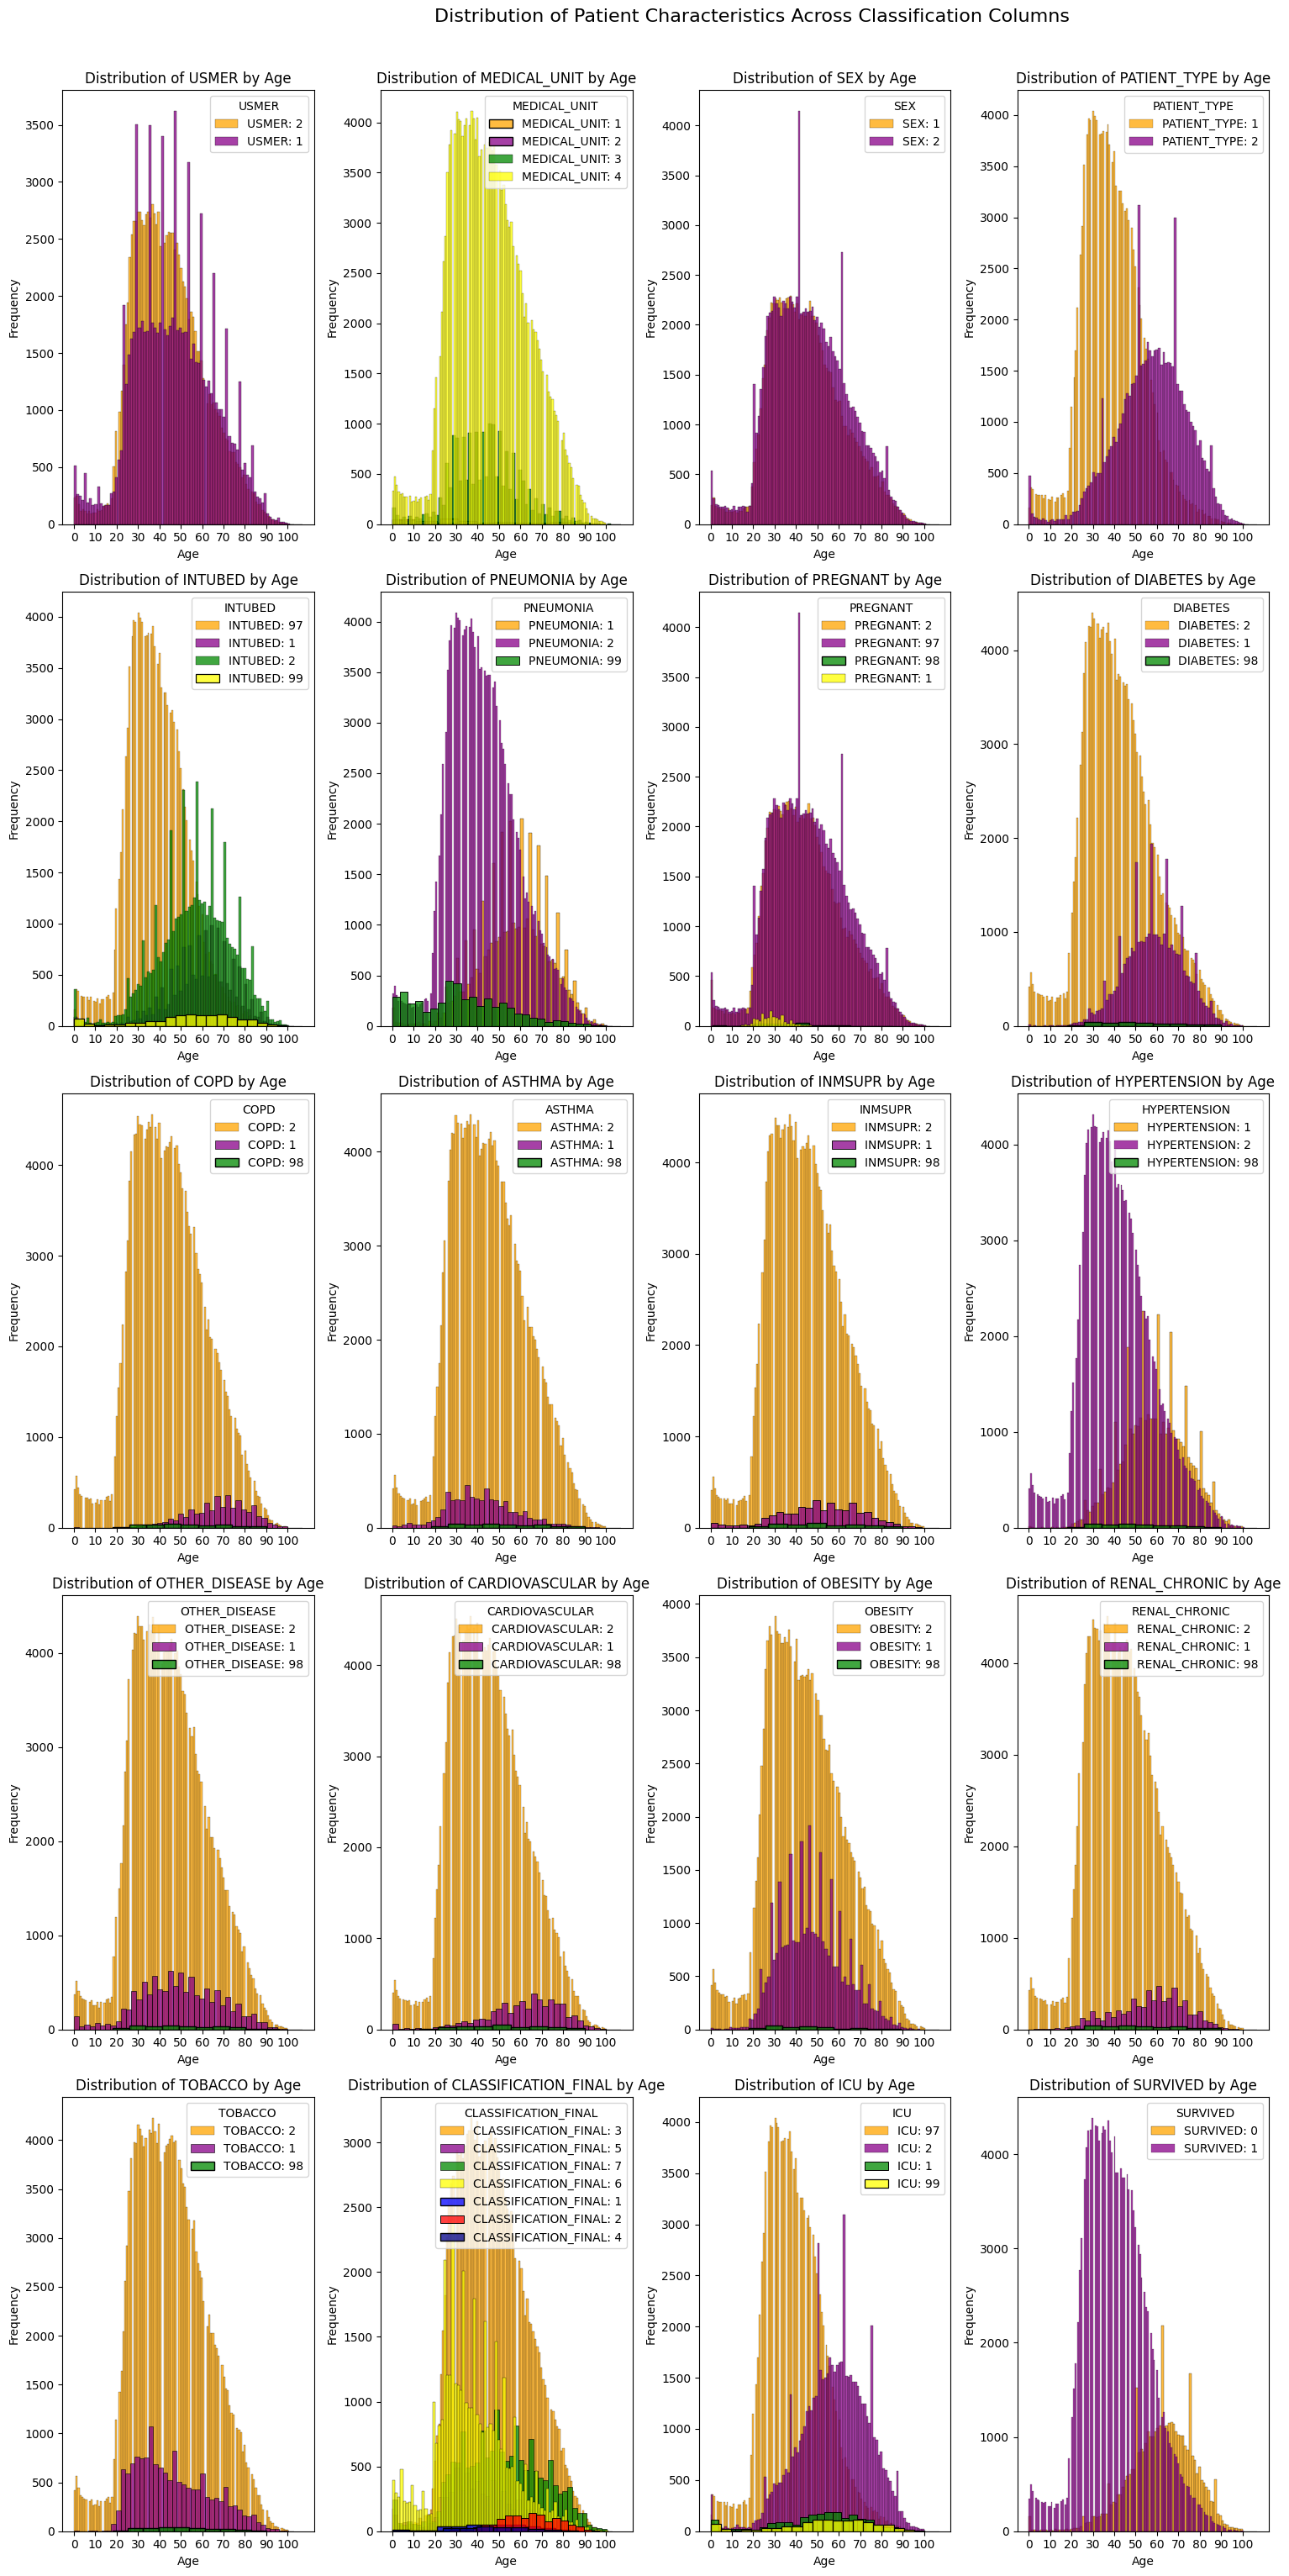

In [8]:
# Display the distribution of patient characteristics across age groups
# Analyzing the diversity within each classification column and assessing its influence within the dataset

# Select all classification columns to plot distributions vs. AGE
classification_columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED',
                          'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
                          'HYPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
                          'RENAL_CHRONIC', 'TOBACCO', 'CLASSIFICATION_FINAL', 'ICU', 'SURVIVED']

# Melt the DataFrame to create long-format data for plotting distributions vs. AGE
melted_df = pd.melt(covid_raw, id_vars=['AGE'], value_vars=classification_columns)

# Define a custom color palette with 7 contrasting colors
custom_palette = sns.color_palette(["#FFA500", "#880088", "#008800", "#FFFF00", "#0000FF", "#FF0000", "#000088"])

# Calculate the number of rows and columns for subplots
rows, cols = len(classification_columns) // 4, 4

# Plot distribution plots for each classification column
fig, axes = plt.subplots(rows, cols, figsize=(18, 30))  # Increase the figure size

for i, col in enumerate(classification_columns, start=1):
    ax = axes.flatten()[i - 1]

    # Filter melted DataFrame for the specific classification column
    melted_col_df = melted_df[melted_df['variable'] == col]

    # Manually create a legend based on unique values in the 'value' column
    legend_labels = melted_col_df['value'].unique()

    # Plot distribution plots for each unique value in the 'value' column
    for j, label in enumerate(legend_labels):
        sns.histplot(x='AGE', hue='value', data=melted_col_df[melted_col_df['value'] == label],
                     multiple='stack', palette=[custom_palette[j]], label=f'{col}: {label}', ax=ax)

    # Adjust the title and labels for each subplot
    ax.set_title(f'Distribution of {col} by Age')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

    # Show age on the x-axis every 10 years
    ax.set_xticks(ticks=range(0, max(covid_raw['AGE']) + 1, 10))
    ax.set_xticklabels(labels=range(0, max(covid_raw['AGE']) + 1, 10))

    # Add legend inside the plot
    ax.legend(title=f'{col}', loc='upper right')  # Adjust legend location

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect parameter to make space for the legend

# Set an overall title for the entire plot
plt.suptitle("Distribution of Patient Characteristics Across Classification Columns", fontsize=16, y=1.02)

# Show the plot
plt.show()


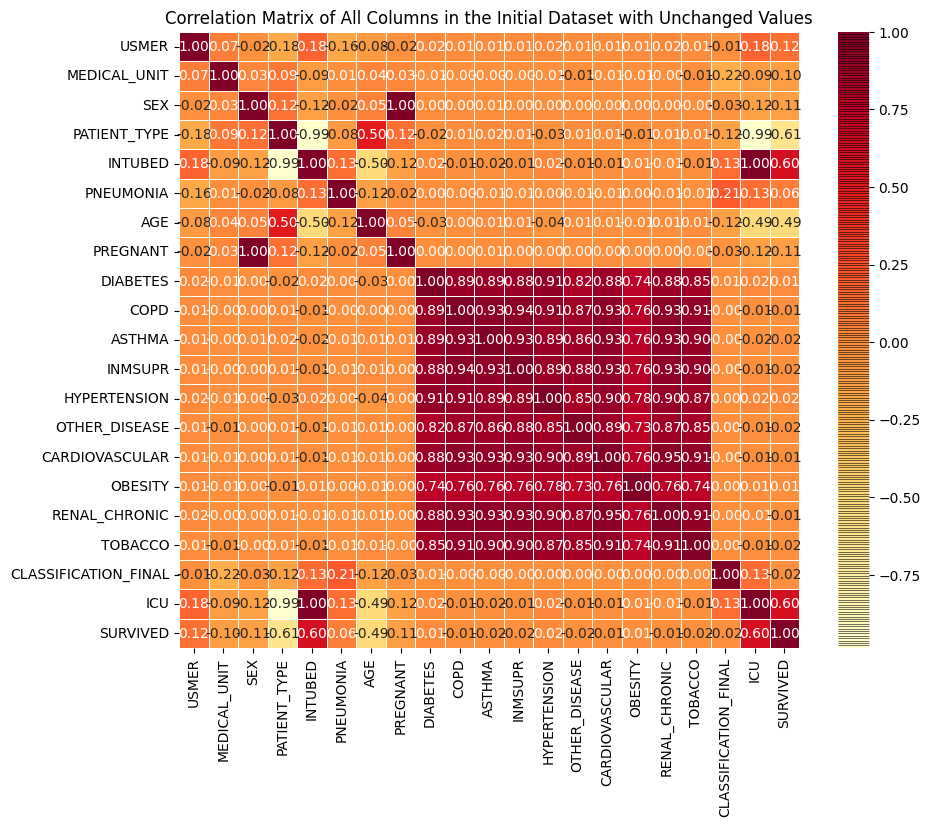

In [9]:
# Calculate the correlation matrix for all columns in the initial dataset with unchanged values
correlation_matrix = covid_raw.corr()

# Set the size of the figure for better visualization
plt.figure(figsize=(10, 8))

# Plot a heatmap of the Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'drawedges': True}, linewidths=0.5)

# Set a descriptive title for the plot
plt.title('Correlation Matrix of All Columns in the Initial Dataset with Unchanged Values')

# Display the plot
plt.show()


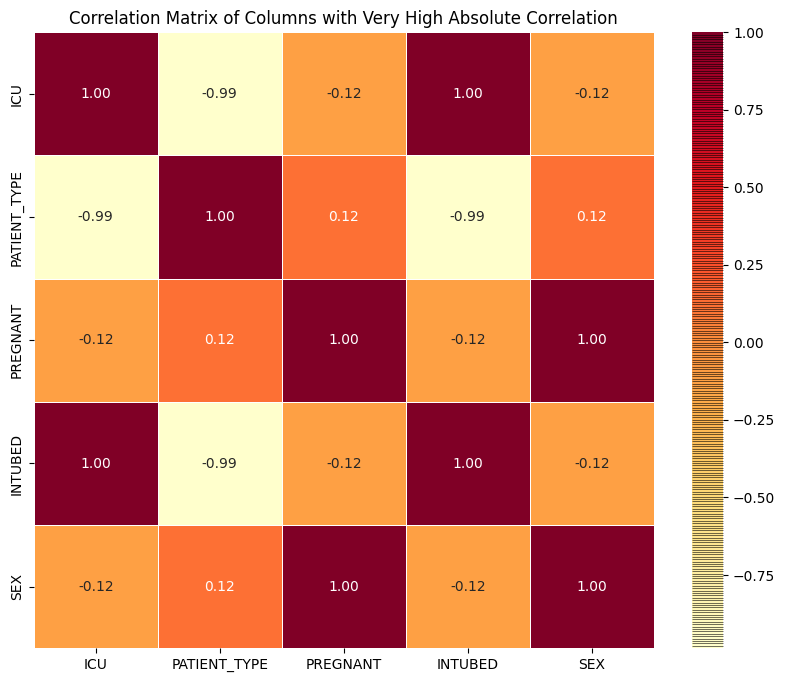

In [10]:
# Zoom into columns that have very high absolute correlation values
selected_columns = ["ICU", "PATIENT_TYPE", "PREGNANT", "INTUBED", "SEX"]
correlation_matrix = covid_raw[selected_columns].corr()

# Set the size of the figure for better visualization
plt.figure(figsize=(10, 8))

# Plot a heatmap of the Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'drawedges': True}, linewidths=0.5)
plt.title('Correlation Matrix of Columns with Very High Absolute Correlation')

# Display the plot
plt.show()

In [11]:
# Frequency table in text to see value distribution within each classification column
# List to store frequency tables
frequency_tables = []

# Classification columns
classification_columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED',
       'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HYPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASSIFICATION_FINAL', 'ICU']

# Loop through each column
for column in classification_columns:
    # Create a frequency table using pandas crosstab
    frequency_table = pd.crosstab(index=covid_raw[column], columns='Frequency')

    # Add column name as a prefix to distinguish tables
    frequency_table = frequency_table.add_prefix(f"{column}_")

    # Append the frequency table to the list
    frequency_tables.append(frequency_table)

# Concatenate all frequency tables into a single DataFrame
result_frequency_table = pd.concat(frequency_tables, axis=1)

# Print or display the result
print(result_frequency_table)

col_0  USMER_Frequency  MEDICAL_UNIT_Frequency  SEX_Frequency  \
1              87909.0                   151.0        95313.0   
2             112090.0                   169.0       104686.0   
3                  NaN                 19175.0            NaN   
4                  NaN                180504.0            NaN   
97                 NaN                     NaN            NaN   
99                 NaN                     NaN            NaN   
98                 NaN                     NaN            NaN   
5                  NaN                     NaN            NaN   
6                  NaN                     NaN            NaN   
7                  NaN                     NaN            NaN   

col_0  PATIENT_TYPE_Frequency  INTUBED_Frequency  PNEUMONIA_Frequency  \
1                    130682.0            17455.0              42313.0   
2                     69317.0            50665.0             152930.0   
3                         NaN                NaN                 

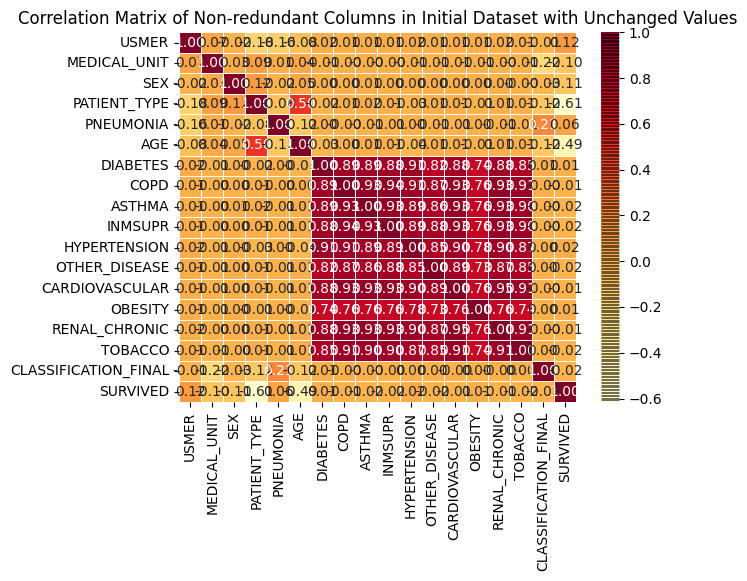

In [12]:
# Findings:
# * Columns SEX and PREGNANT have a correlation of almost 1 => drop PREGNANT as redundant
# * Columns INTUBED, PATIENT_TYPE, ICU have a correlation of almost 1 => drop ICU and INTUBED as redundant
#    They have higher skewness than PATIENT_TYPE

# 1. Drop redundant columns based on findings
covid_good_cols = covid_raw.drop(columns=["PREGNANT", "ICU", "INTUBED"])

# 2. Replace data type Date Died column with int type = SURVIVED: 1 - Yes / 0 - No
covid_good_cols = covid_good_cols.assign(SURVIVED=[0 if date != "9999-99-99" else 1 for date in covid_good_cols["DATE_DIED"]])
covid_good_cols = covid_good_cols.drop(columns=["DATE_DIED"])

# Plot the correlation matrix of non-redundant columns
plt.title('Correlation Matrix of Non-redundant Columns in Initial Dataset with Unchanged Values')
sns.heatmap(covid_good_cols.corr(), annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'drawedges': True}, linewidths=0.5)

# Display the plot
plt.show()

In [13]:
# Create a new DataFrame to avoid in-place operations
covid_cleaned = covid_good_cols.copy()

# Replace 2 (No) with 0 to be consistent with binary
columns_to_replace = ['USMER', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
                       'HYPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
                       'RENAL_CHRONIC', 'TOBACCO']
covid_cleaned[columns_to_replace] = covid_cleaned[columns_to_replace].replace({2: 0})

# Remove rows with missing values
covid_cleaned = covid_cleaned.dropna()

# Display descriptive statistics of the cleaned dataset
covid_cleaned.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,SURVIVED
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,0.439547,3.900170,1.523433,1.346587,2.565798,45.317002,0.291791,0.140751,0.152146,0.139076,0.334382,0.179411,0.146621,0.252021,0.152206,0.203621,4.006060,0.792964
std,0.496333,0.309976,0.499452,0.475884,15.056504,17.262120,3.442618,3.430147,3.452036,3.450694,3.311262,3.549677,3.458354,2.748769,3.445151,3.558465,1.517395,0.405183
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.000000,1.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
50%,0.000000,4.000000,2.000000,1.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,1.000000,4.000000,2.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,4.000000,2.000000,2.000000,99.000000,107.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,1.000000


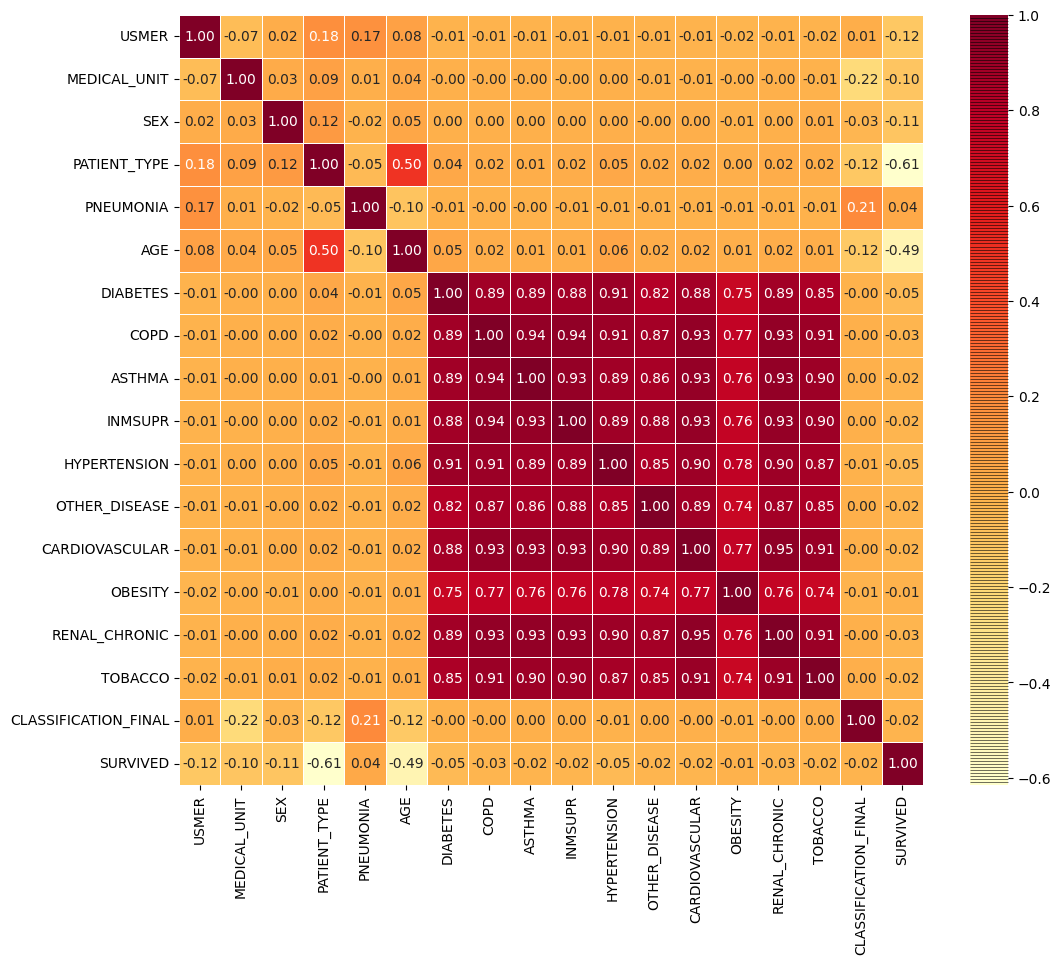

In [15]:
# Revisit correlation map
plt.figure(figsize=(12, 10))  # Set a larger figure size for better visualization

sns.heatmap(covid_cleaned.corr(), annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'drawedges': True}, linewidths=0.5)

# Save the plot as an image to import into Tableau later
plt.savefig('correlation_matrix_4.png')

# Display the plot
plt.show()

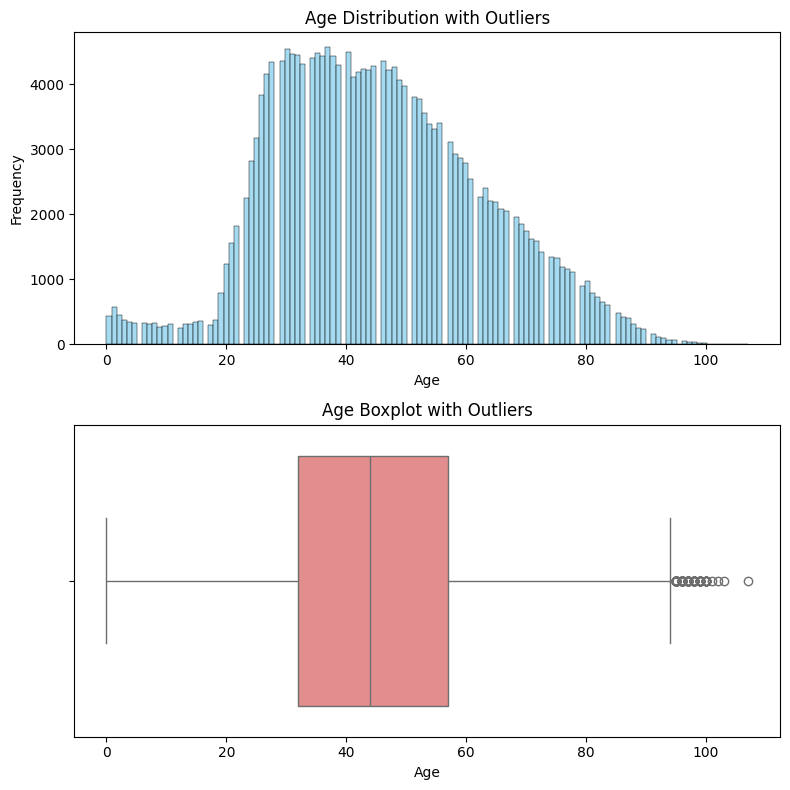

In [16]:
# Visualize age distribution
plt.figure(figsize=(8, 8))

# Plot the first subplot (distribution plot)
plt.subplot(2, 1, 1)
sns.histplot(covid_cleaned["AGE"], kde=False, color="skyblue", edgecolor="black")
plt.title('Age Distribution with Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot the second subplot (boxplot)
plt.subplot(2, 1, 2)
sns.boxplot(x=covid_cleaned["AGE"], color="lightcoral")
plt.title('Age Boxplot with Outliers')
plt.xlabel('Age')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
# Calculate the first and third quartiles and IQR for the "AGE" column
Q1 = covid_cleaned["AGE"].quantile(0.25)
Q3 = covid_cleaned["AGE"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print lower and upper bounds for reference
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Filter out outliers for the "AGE" column based on the calculated bounds
covid_without_outliers = covid_cleaned[(covid_cleaned['AGE'] >= lower_bound) & (covid_cleaned['AGE'] <= upper_bound)]

# Calculate skewness and kurtosis for the cleaned "AGE" column
skewness = stats.skew(covid_without_outliers['AGE'])
kurtosis = stats.kurtosis(covid_without_outliers['AGE'])

# Print skewness and kurtosis values
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Lower Bound: -5.5
Upper Bound: 94.5
Skewness: 0.2236250902558843
Kurtosis: -0.22652059712799932


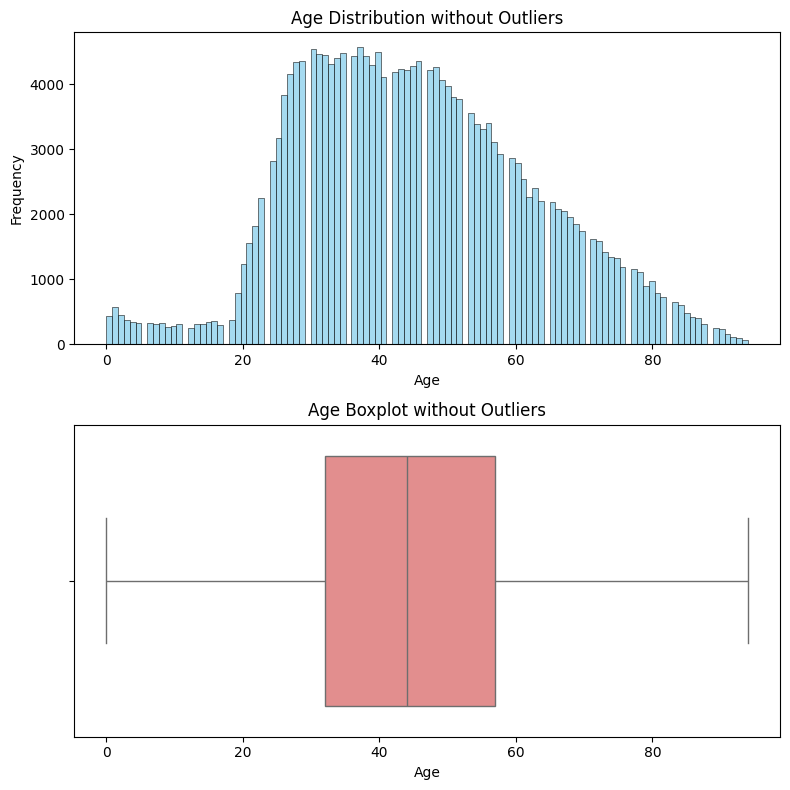

In [19]:
# Visualize age distribution after removing outliers
plt.figure(figsize=(8, 8))

# Plot the first subplot (distribution plot)
plt.subplot(2, 1, 1)
sns.histplot(covid_without_outliers["AGE"], kde=False, color="skyblue", edgecolor="black")
plt.title('Age Distribution without Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot the second subplot (boxplot)
plt.subplot(2, 1, 2)
sns.boxplot(x=covid_without_outliers["AGE"], color="lightcoral")
plt.title('Age Boxplot without Outliers')
plt.xlabel('Age')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

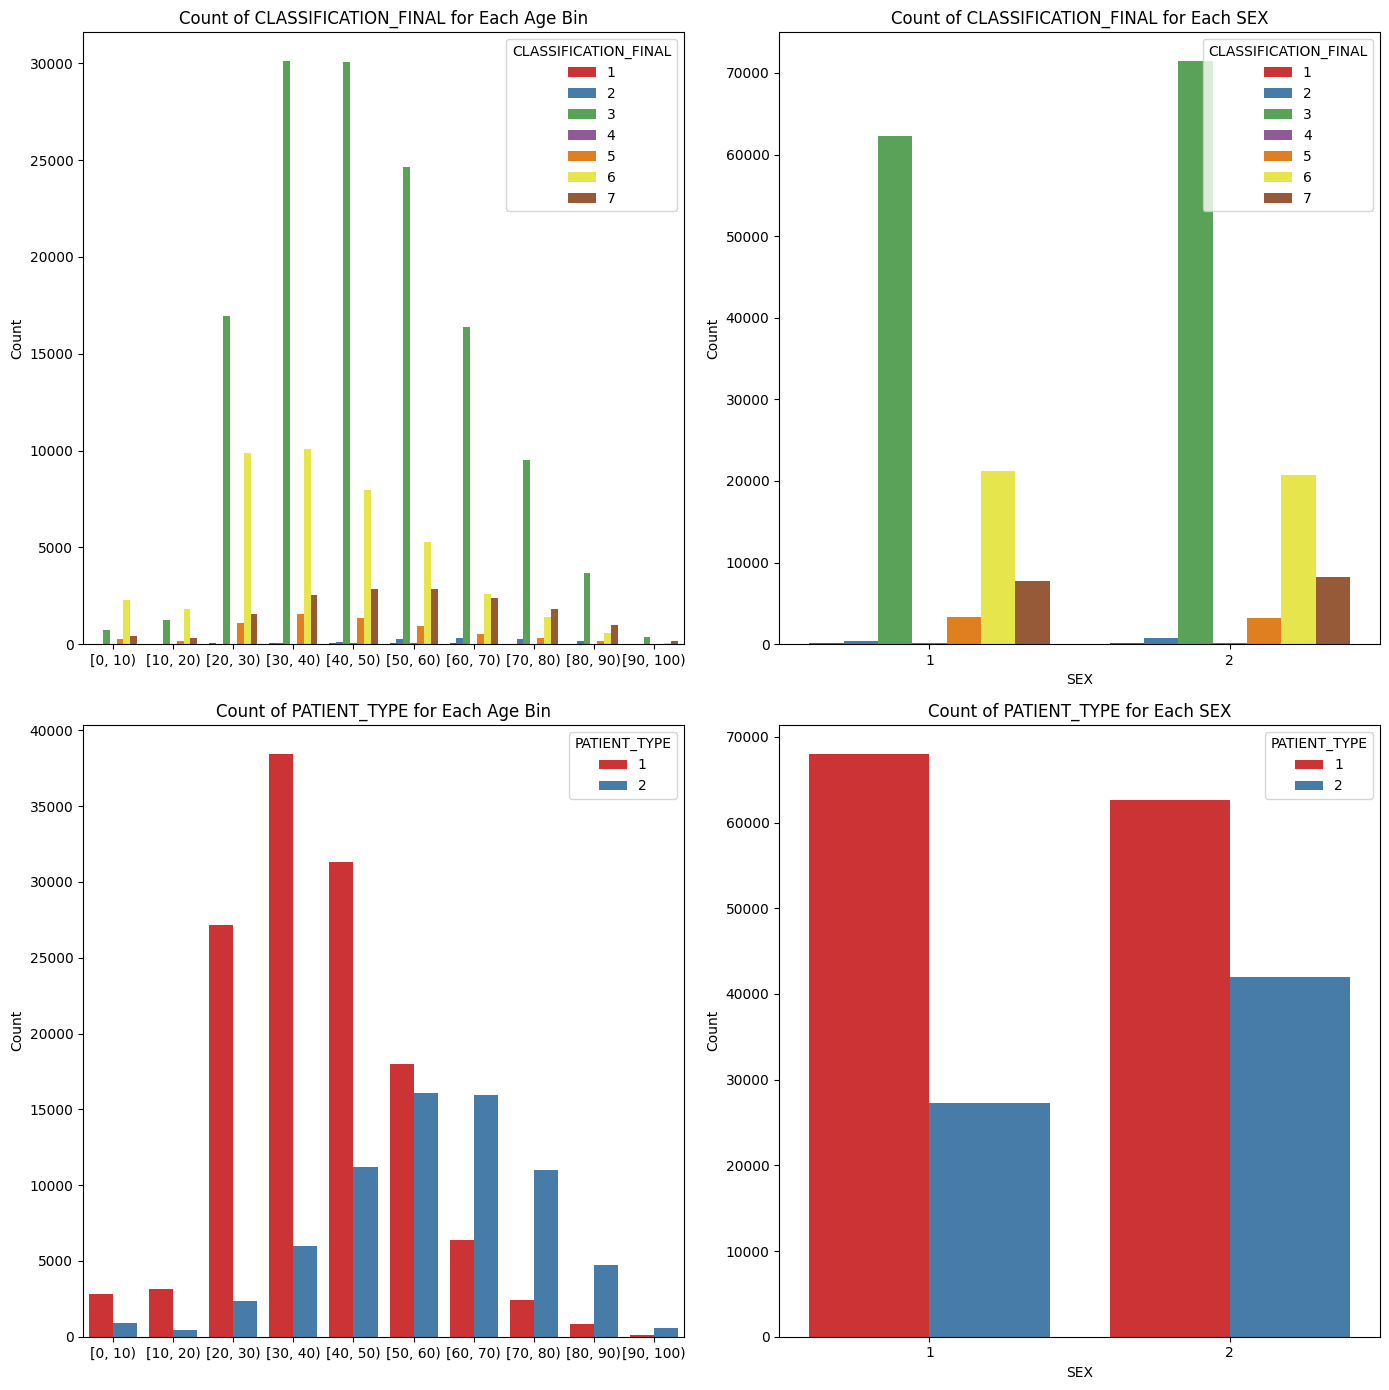

In [20]:
# Visualize Counts of CLASSIFICATION_FINAL and PATIENT_TYPE vs AGE and SEX
plt.figure(figsize=(14, 14))  # Increase figure size for better visibility

# Create age bins
covid_without_outliers['AGE_BINS'] = pd.cut(covid_without_outliers['AGE'], bins=range(0, max(covid_without_outliers['AGE']) + 10, 10), right=False)

# Subplot 1
plt.subplot(2, 2, 1)
sns.countplot(x='AGE_BINS', hue='CLASSIFICATION_FINAL', data=covid_without_outliers, palette='Set1', linewidth=2.5)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Count of CLASSIFICATION_FINAL for Each Age Bin')
plt.legend(title='CLASSIFICATION_FINAL', loc='upper right')

# Subplot 2
plt.subplot(2, 2, 2)
sns.countplot(x='SEX', hue='CLASSIFICATION_FINAL', data=covid_without_outliers, palette='Set1', linewidth=2.5)
plt.xlabel('SEX')
plt.ylabel('Count')
plt.title('Count of CLASSIFICATION_FINAL for Each SEX')
plt.legend(title='CLASSIFICATION_FINAL', loc='upper right')

# Subplot 3
plt.subplot(2, 2, 3)
sns.countplot(x='AGE_BINS', hue='PATIENT_TYPE', data=covid_without_outliers, palette='Set1', linewidth=2.5)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Count of PATIENT_TYPE for Each Age Bin')
plt.legend(title='PATIENT_TYPE', loc='upper right')

# Subplot 4
plt.subplot(2, 2, 4)
sns.countplot(x='SEX', hue='PATIENT_TYPE', data=covid_without_outliers, palette='Set1', linewidth=2.5)
plt.xlabel('SEX')
plt.ylabel('Count')
plt.title('Count of PATIENT_TYPE for Each SEX')
plt.legend(title='PATIENT_TYPE', loc='upper right')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [21]:
# List to store frequency tables
frequency_tables = []

# Classification columns
classification_columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HYPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASSIFICATION_FINAL', 'SURVIVED']

# Create frequency tables using list comprehension
frequency_tables = [pd.crosstab(index=covid_without_outliers[column], columns=f'Frequency_{column}') for column in classification_columns]

# Concatenate all frequency tables into a single DataFrame
result_frequency_table = pd.concat(frequency_tables, axis=1)

# Print or display the result
print(result_frequency_table)


col_0  Frequency_USMER  Frequency_MEDICAL_UNIT  Frequency_SEX  \
0             112000.0                     NaN            NaN   
1              87799.0                   151.0        95224.0   
2                  NaN                   168.0       104575.0   
3                  NaN                 19164.0            NaN   
4                  NaN                180316.0            NaN   
99                 NaN                     NaN            NaN   
98                 NaN                     NaN            NaN   
5                  NaN                     NaN            NaN   
6                  NaN                     NaN            NaN   
7                  NaN                     NaN            NaN   

col_0  Frequency_PATIENT_TYPE  Frequency_PNEUMONIA  Frequency_DIABETES  \
0                         NaN             152832.0            165251.0   
1                    130652.0              42218.0             34303.0   
2                     69147.0                  NaN            

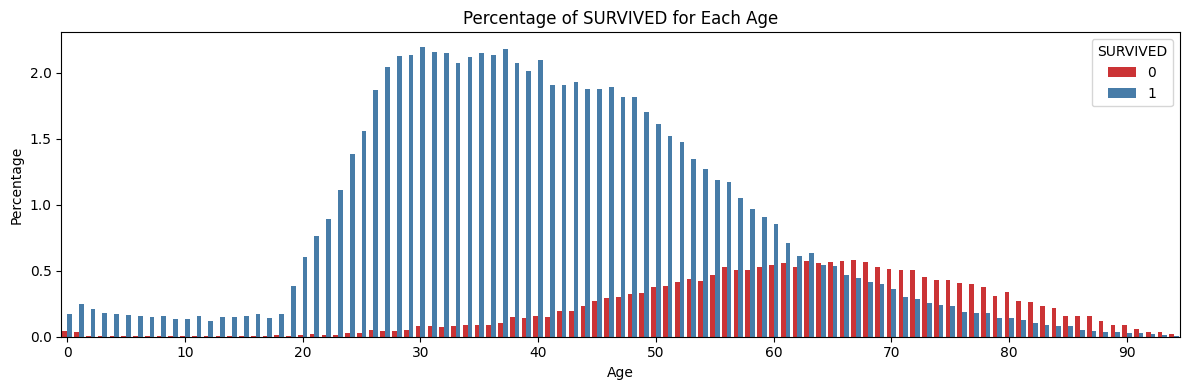

In [37]:
# Visualize SURVIVED vs AGE

# Set the figure size
plt.figure(figsize=(12, 4))

# Create a countplot for "AGE" vs "SURVIVED"
sns.countplot(x='AGE', hue='SURVIVED', data=covid_without_outliers, palette='Set1', linewidth=2.5, dodge=True, stat='percent')

# Set x-axis ticks every 10 years
plt.xticks(ticks=range(0, max(covid_without_outliers['AGE']) + 1, 10), labels=range(0, max(covid_without_outliers['AGE']) + 1, 10))

# Set the title and labels
plt.title(f'Percentage of SURVIVED for Each Age')
plt.xlabel('Age')
plt.ylabel('Percentage')

# Adjust legend for better visibility (placed in the upper right)
plt.legend(title='SURVIVED', loc='upper right')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [38]:
# II. Machine Learning - Build and Train Model

In [39]:
# 1. choose columns for the model

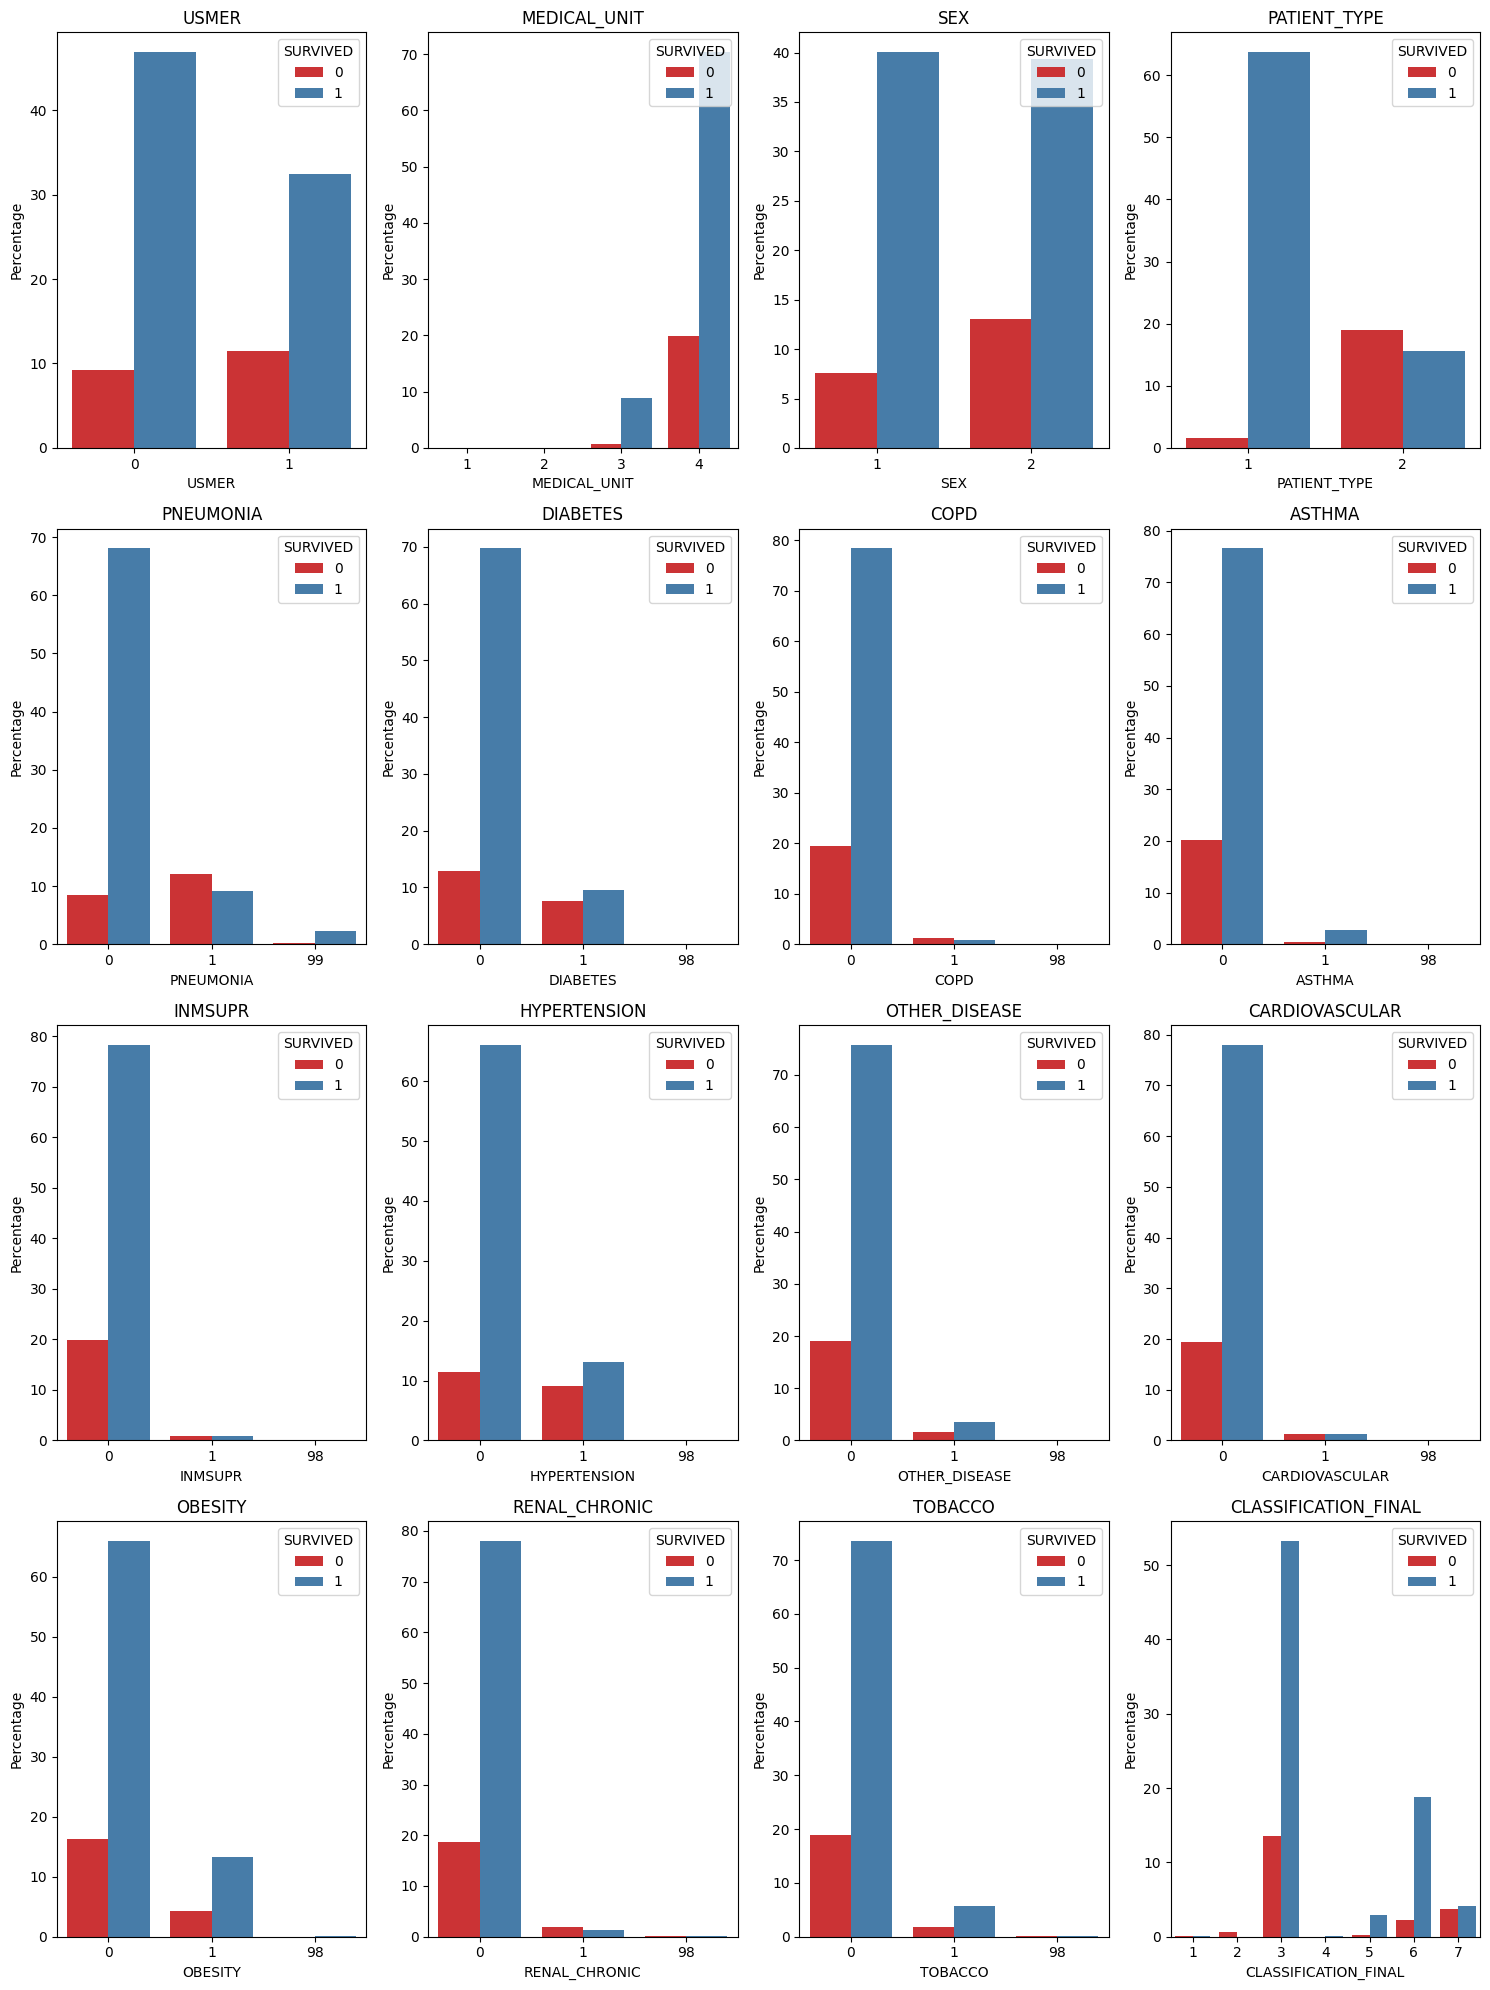

In [43]:
# Visualize value distribution within all classification columns to select columns for Model Training
columns_to_include = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA',
                       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HYPERTENSION',
                       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
                       'TOBACCO', 'CLASSIFICATION_FINAL']

# Calculate the number of rows needed for the matrix layout (4 plots per row)
num_rows = len(columns_to_include) // 4 + int(len(columns_to_include) % 4 > 0)

plt.figure(figsize=(15, 5 * num_rows))

# Iterate over each column
for i, col in enumerate(columns_to_include, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the subplot layout for 4 plots per row

    # Use a high-contrast color palette
    sns.countplot(x=col, hue='SURVIVED', data=covid_without_outliers, palette='Set1', linewidth=2.5, dodge=True, stat='percent')

    # Adjust the title and labels
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')

    # Move legend inside the plot area
    plt.legend(title='SURVIVED', loc='upper right')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


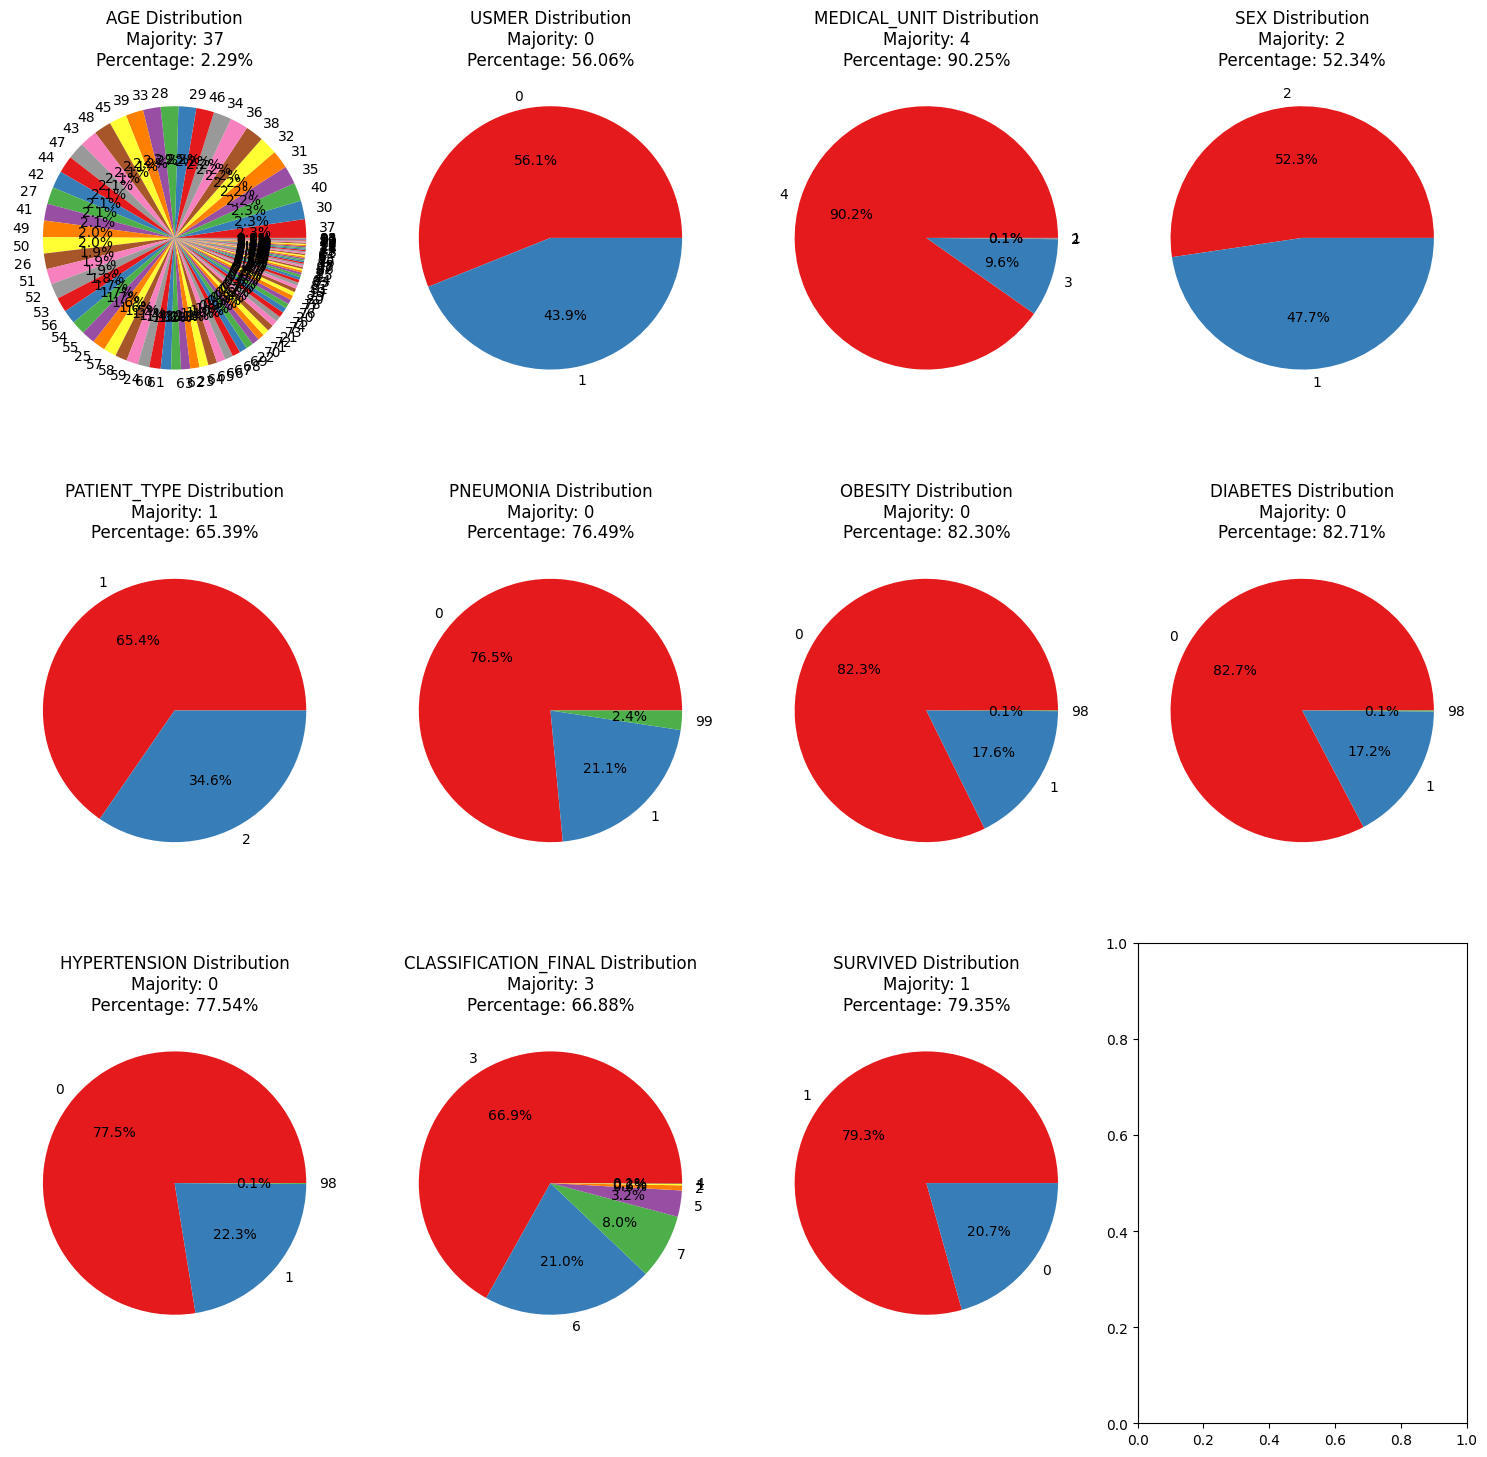

In [44]:
# Review value distribution in the above plots and frequency tables
# Choose columns with better distribution

# Select columns to include
columns_to_include = [
    'AGE',
    'USMER',
    'MEDICAL_UNIT',
    'SEX',
    'PATIENT_TYPE',
    'PNEUMONIA',
    'OBESITY',
    'DIABETES',
    'HYPERTENSION',
    'CLASSIFICATION_FINAL',
    'SURVIVED'
]

# Calculate the number of rows and columns for subplots
num_rows = len(columns_to_include) // 4 + (len(columns_to_include) % 4 > 0)
num_cols = min(len(columns_to_include), 4)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Iterate over each selected column
for i, col in enumerate(columns_to_include):
    # Extract column data
    col_data = covid_without_outliers[col]

    # Count occurrences of 'yes' and 'no'
    value_counts = col_data.value_counts()

    # Check if there is a clear majority
    majority_value = value_counts.idxmax()
    majority_percentage = value_counts[majority_value] / len(col_data)

    # Plot pie chart with Set1 color palette
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
    axes[i].set_title(f'{col} Distribution\nMajority: {majority_value}\nPercentage: {majority_percentage:.2%}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


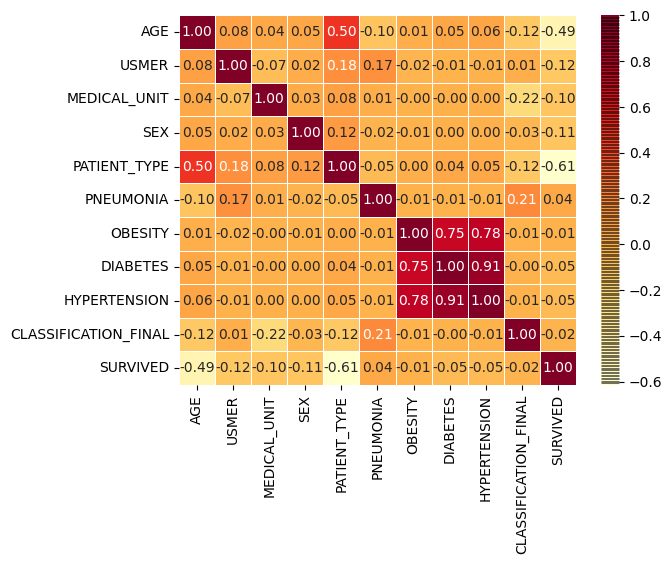

In [45]:
# Revisit correlations, heatmap
sns.heatmap(data=covid_without_outliers[[
    'AGE',
    'USMER',
    'MEDICAL_UNIT',
    'SEX',
    'PATIENT_TYPE',
    'PNEUMONIA',
    'OBESITY',
    'DIABETES',
    'HYPERTENSION',
    'CLASSIFICATION_FINAL',
    'SURVIVED'
]].corr(), annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'drawedges': True}, linewidths=0.5)

plt.show()

In [46]:
# based on frequency table, keep the columns with good distribution
# to avoid oversampling
# also, the above heatmap shows higher correlation between: AGE, PATIENT_TYPE, SURVIVED
"""
    'AGE',
    'USMER',
    'MEDICAL_UNIT',
    'SEX',
    'PATIENT_TYPE',
    'PNEUMONIA',
    'OBESITY',
    'DIABETES',
    'HYPERTENSION',
    'CLASSIFICATION_FINAL',
    'SURVIVED'
"""

"\n    'AGE',\n    'USMER',\n    'MEDICAL_UNIT',\n    'SEX',\n    'PATIENT_TYPE',\n    'PNEUMONIA',\n    'OBESITY',\n    'DIABETES',\n    'HYPERTENSION',\n    'CLASSIFICATION_FINAL',\n    'SURVIVED'\n"

In [47]:
# 2. create and train a model

In [49]:
# Scale the data
scaler = StandardScaler()

# Declare the final dataframe to use in machine learning and analysis
covid_final_ml = covid_without_outliers

# Check data types and handle non-numeric values
numeric_columns = covid_final_ml.select_dtypes(include=['number']).columns
covid_final_ml[numeric_columns] = covid_final_ml[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
covid_final_ml = covid_final_ml.dropna()

# Select features and target
# Note: Ensure that the features and target are appropriately chosen based on the problem statement.
features = covid_final_ml[['AGE', 'SEX', 'PNEUMONIA', 'OBESITY', 'DIABETES', 'HYPERTENSION', 'PATIENT_TYPE', 'MEDICAL_UNIT', 'USMER']]
target = covid_final_ml['SURVIVED']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=18)

# Scale the features using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the descriptive statistics of the scaled training data
print(pd.DataFrame(X_train_scaled).describe())


                  0             1             2             3             4  \
count  1.598390e+05  1.598390e+05  1.598390e+05  1.598390e+05  1.598390e+05   
mean  -1.790593e-16  1.597664e-16  1.155795e-17  2.022641e-18  1.022434e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.631383e+00 -1.048806e+00 -1.710114e-01 -9.263332e-02 -8.487967e-02   
25%   -7.699602e-01 -1.048806e+00 -1.710114e-01 -9.263332e-02 -8.487967e-02   
50%   -7.192658e-02  9.534649e-01 -1.710114e-01 -9.263332e-02 -8.487967e-02   
75%    6.842765e-01  9.534649e-01 -1.710114e-01 -9.263332e-02 -8.487967e-02   
max    2.836547e+00  9.534649e-01  6.374856e+00  3.672617e+01  2.888314e+01   

                  5             6             7             8  
count  1.598390e+05  1.598390e+05  1.598390e+05  1.598390e+05  
mean  -1.080224e-17 -6.392435e-17  8.615118e-17  7.646028e-18  
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  
min   -1.022788e-01 -7.257988e-0

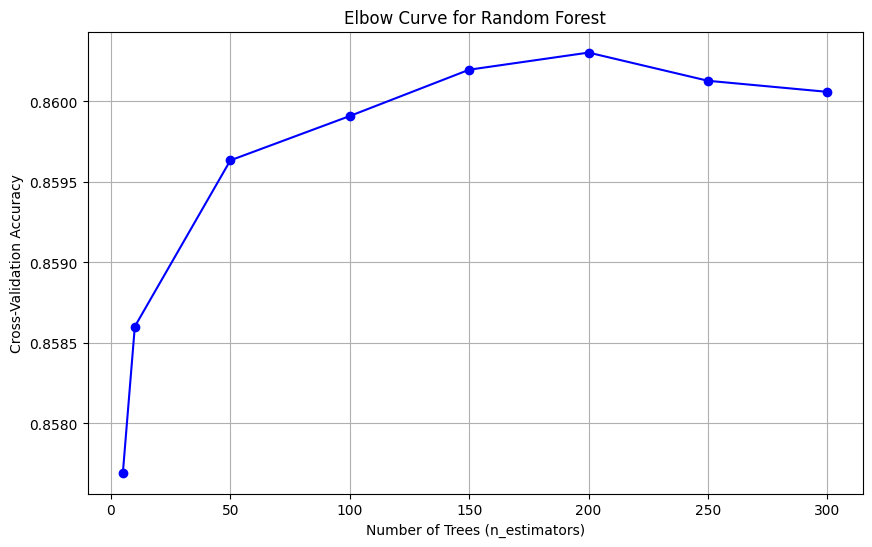

In [50]:
""" comment out since it takes a long time to run and i only need it once, to determine parameter value
# List of possible values for n_estimators
n_estimators_values = [5, 10, 50, 100, 150, 200, 250, 300]

# List to store cross-validation scores
cv_scores = []

# Iterate over different values of n_estimators
for n_estimators in n_estimators_values:
    # Create a random forest classifier with the current value of n_estimators
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=18)

    # Perform cross-validation and store the mean accuracy
    scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the elbow curve for selecting the optimal number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()
"""

# 200 trees gives highest accuracy

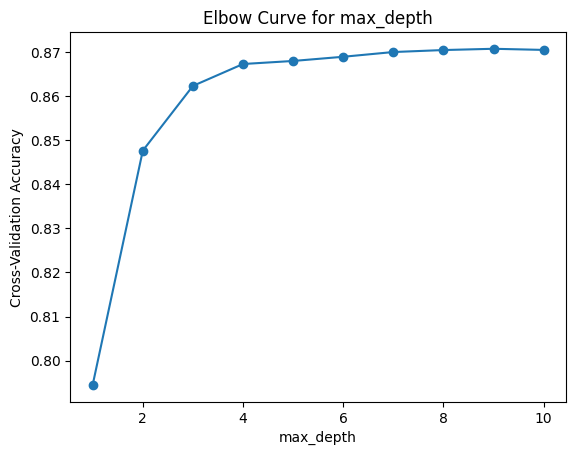

In [51]:
""" comment out since it takes a long time to run and i only need it once, to determine n_estimators value

# The following code is commented out since it takes a long time to run, and it's only needed once
# to determine the optimal value for the 'n_estimators' parameter.

# Create a range of 'max_depth' values to test
max_depth_values = range(1, 11)

# List to store cross-validation scores for different 'max_depth' values
cv_scores = []

# Perform cross-validation for each 'max_depth' value
for depth in max_depth_values:
    # Create a RandomForestClassifier with the current value of 'max_depth'
    rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=depth, random_state=18)

    # Perform cross-validation and store the mean accuracy
    scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the elbow curve to visualize the impact of 'max_depth' on cross-validation accuracy
plt.plot(max_depth_values, cv_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Elbow Curve for max_depth')
plt.show()
"""

# 3 - 4 the best values for 'max_depth' based on the elbow curve.


Random Forest Accuracy: 0.8655905905905906
Confusion Matrix:
[[ 5529  2884]
 [ 2487 29060]]
Precision: 0.9097170047583271
Recall: 0.9211652455067043
F1-Score: 0.9154053330393285


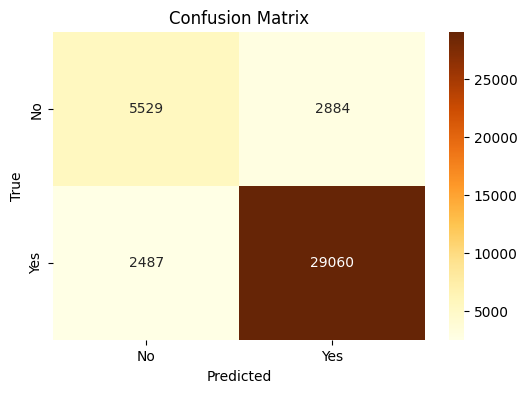

In [53]:
# Train Random Forest model
# Use hyperparameter values determined from the elbow curves
random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=18)

# Fit the Random Forest model on the scaled training data
random_forest_model.fit(X_train_scaled, y_train)

# Evaluate the Random Forest model on the scaled test data
accuracy = random_forest_model.score(X_test_scaled, y_test)
print("Random Forest Accuracy:", accuracy)

# Make predictions using the trained Random Forest model on the scaled test data
y_pred = random_forest_model.predict(X_test_scaled)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Extract True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN) from the confusion matrix
TP = conf_matrix[1, 1]  # True Positive
FP = conf_matrix[0, 1]  # False Positive
TN = conf_matrix[0, 0]  # True Negative
FN = conf_matrix[1, 0]  # False Negative

# Calculate and print precision, recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Plot confusion matrix using seaborn with correct labels
plt.figure(figsize=(6, 4))
class_labels = ["No", "Yes"]  # Reversed labels to match interpretation
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Results and Interpretation:
# Accuracy = 86.56% => majority of predictions (86.56%) are correct which means the overall effectiveness of the model is reasonably high.
# Confusion Matrix:
#     True Positives (TP): 29,060 correctly predicted as "Survived."
#     False Positives (FP): 2,884 incorrectly predicted as "Survived" when they were actually "Not Survived." - The worst outcome of the model advice.
#     True Negatives (TN): 5,529 correctly predicted as "Not Survived."
#     False Negatives (FN): 2,487 instances were incorrectly predicted as "Not Survived" when they were actually "Survived." - Incorrect prediction but not as bad as False Positive.
# Precision = 90.97% => when the model predicts that a patient survived, it is correct about 90.97% of the time.
# Recall = 92.12% => model effectively identifies about 92.12% of all relevant instances of survival.
# F1-Score = 91.54 => high value indicates good overall performance of the model.


In [ ]:
"""comment out as I only run it to check things and it takes a long time in some scenarios

# Generate all combinations of features
ages = list(range(78,79))
sex_values = [1, 2]
pneumonia_values = [0, 1, 99]
obesity_values = [0, 1, 98]
diabetes_values = [0, 1, 98]
hypertension_values = [0, 1, 98]
patient_type_values = [1, 2]
medical_unit_values = [1, 2, 3, 4]
usmer_values = [0, 1]

feature_combinations = list(itertools.product(ages, sex_values, pneumonia_values, obesity_values, diabetes_values, hypertension_values, patient_type_values, medical_unit_values, usmer_values))

# Create a DataFrame with all feature combinations
new_patients = pd.DataFrame(feature_combinations, columns=['AGE', 'SEX', 'PNEUMONIA', 'OBESITY', 'DIABETES', 'HYPERTENSION', 'PATIENT_TYPE', 'MEDICAL_UNIT', 'USMER'])

# Scale new patient data
new_patients_scaled = scaler.transform(new_patients)

# Predict SURVIVED for the new patients
predictions_random_forest = random_forest_model.predict(new_patients_scaled)

# Display the predictions for each age
for i in range(len(new_patients)):
    age = new_patients['AGE'].iloc[i]
    sex = new_patients['SEX'].iloc[i]
    pneumonia = new_patients['PNEUMONIA'].iloc[i]
    obesity = new_patients['OBESITY'].iloc[i]
    diabetes = new_patients['DIABETES'].iloc[i]
    hypertension = new_patients['HYPERTENSION'].iloc[i]
    patient_type = new_patients['PATIENT_TYPE'].iloc[i]
    medical_unit = new_patients['MEDICAL_UNIT'].iloc[i]
    usmer = new_patients['USMER'].iloc[i]

    prediction_random_forest = predictions_random_forest[i]
    print(f"Random Forest: For AGE {age}, SEX {sex}, PNEUMONIA {pneumonia}, OBESITY {obesity}, DIABETES {diabetes}, HYPERTENSION {hypertension}, PATIENT_TYPE {patient_type}, MEDICAL_UNIT {medical_unit}, USMER {usmer}: Predicted SURVIVED: {prediction_random_forest}")
"""

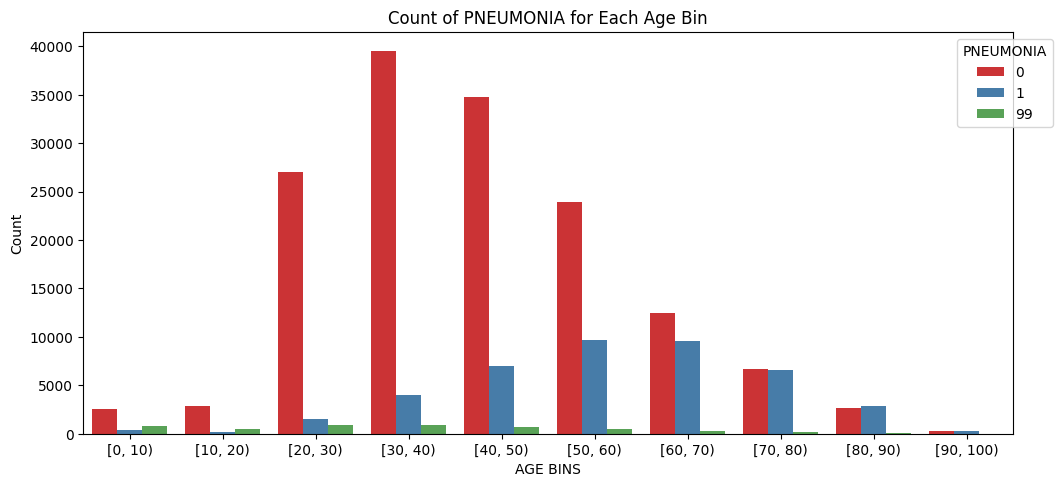

In [55]:
# Plot PNEUMONIA vs AGE since it is included in the model

# Create a subplot for the PNEUMONIA vs AGE plot
plt.figure(figsize=(12, 24))
plt.subplot(4, 1, 1)

# Countplot of PNEUMONIA for Each Age Bin
sns.countplot(x='AGE_BINS', hue='PNEUMONIA', data=covid_final_ml, palette='Set1', linewidth=2.5)

# Axes labels and title
plt.xlabel('AGE BINS')
plt.ylabel('Count')
plt.title('Count of PNEUMONIA for Each Age Bin')

# Legend adjustments
plt.legend(title='PNEUMONIA', bbox_to_anchor=(1.05, 1), loc='upper right')

# Display the plot
plt.show()


In [56]:
# Predict SURVIVAL outcome for new patients
new_patients = pd.DataFrame({
    'AGE': [25, 3, 55, 30, 65, 80, 85, 90],
    'SEX': [1, 2, 1, 2, 1, 2, 1, 2],
    'PNEUMONIA': [0, 99, 1, 0, 1, 0, 1, 0],
    'OBESITY': [0, 99, 1, 0, 1, 0, 1, 0],
    'DIABETES': [0, 98, 1, 0, 1, 0, 1, 0],
    'HYPERTENSION': [0, 99, 1, 0, 1, 0, 1, 0],
    'PATIENT_TYPE': [1, 2, 1, 1, 2, 1, 2, 1],
    'MEDICAL_UNIT': [1, 2, 1, 1, 3, 3, 4, 3],
    'USMER': [1, 0, 1, 0, 1, 1, 0, 1]
})

# Reorder columns to match the model features order
new_patients = new_patients[['AGE', 'SEX', 'PNEUMONIA', 'OBESITY', 'DIABETES', 'HYPERTENSION', 'PATIENT_TYPE', 'MEDICAL_UNIT', 'USMER']]

# Scale new patient data
new_patients_scaled = scaler.transform(new_patients)

# Predict SURVIVED for the new patients
predictions = random_forest_model.predict(new_patients_scaled)

# Display the predictions
print("Random Forest Predictions for SURVIVED:")
print(predictions)


Random Forest Predictions for SURVIVED:
[1 1 1 1 0 1 0 1]


In [65]:
# ANSI codes for colors
RED = "\033[91m"
GREEN = "\033[92m"
RESET = "\033[0m"

# columns that depend on medical advice
medical_advice_columns = ['PATIENT_TYPE', 'MEDICAL_UNIT', 'USMER']

# Create all possible combinations of values for the specified columns
combinations = list(itertools.product(*[covid_final_ml[col].unique() for col in medical_advice_columns]))

# Iterate over all possible combinations of values for specified columns
for combo in combinations:
    # Create a dictionary with the current combination of values
    conditions = dict(zip(medical_advice_columns, combo))

    # Create a DataFrame with the current conditions
    patient_data = pd.DataFrame(conditions, index=[0])

    # Add other required columns and reorder them to match the model's feature order
    patient_data['AGE'] = 58
    patient_data['SEX'] = 1
    patient_data['PNEUMONIA'] = 1
    patient_data['OBESITY'] = 1
    patient_data['DIABETES'] = 1
    patient_data['HYPERTENSION'] = 1

    # Reorder the columns to match the model features order
    patient_data = patient_data[['AGE', 'SEX', 'PNEUMONIA', 'OBESITY', 'DIABETES', 'HYPERTENSION', 'PATIENT_TYPE', 'MEDICAL_UNIT', 'USMER']]

    # Scale the patient data using the previously fitted scaler
    patient_data_scaled = scaler.transform(patient_data)

    # Predict the outcome using the trained random forest model
    prediction = random_forest_model.predict(patient_data_scaled)

    # Display the current conditions
    print(f"\nPatient Conditions: {conditions}")

    # Provide advice based on the model's prediction
    if prediction[0] == 1:
        print(f"{GREEN}\u2714 The patient is predicted to survive.{RESET}")
    else:
        print(f"{RED}\u2718 The patient is predicted not to survive.{RESET}")




Patient Conditions: {'PATIENT_TYPE': 1, 'MEDICAL_UNIT': 1, 'USMER': 0}
✔ The patient is predicted to survive.

Patient Conditions: {'PATIENT_TYPE': 1, 'MEDICAL_UNIT': 1, 'USMER': 1}
✔ The patient is predicted to survive.

Patient Conditions: {'PATIENT_TYPE': 1, 'MEDICAL_UNIT': 2, 'USMER': 0}
✔ The patient is predicted to survive.

Patient Conditions: {'PATIENT_TYPE': 1, 'MEDICAL_UNIT': 2, 'USMER': 1}
✔ The patient is predicted to survive.

Patient Conditions: {'PATIENT_TYPE': 1, 'MEDICAL_UNIT': 3, 'USMER': 0}
✔ The patient is predicted to survive.

Patient Conditions: {'PATIENT_TYPE': 1, 'MEDICAL_UNIT': 3, 'USMER': 1}
✔ The patient is predicted to survive.

Patient Conditions: {'PATIENT_TYPE': 1, 'MEDICAL_UNIT': 4, 'USMER': 0}
✔ The patient is predicted to survive.

Patient Conditions: {'PATIENT_TYPE': 1, 'MEDICAL_UNIT': 4, 'USMER': 1}
✔ The patient is predicted to survive.

Patient Conditions: {'PATIENT_TYPE': 2, 'MEDICAL_UNIT': 1, 'USMER': 0}
✘ The patient is predicted not to surviv

In [ ]:
# Feature Importance

Feature: AGE, Importance: 0.2679364066221953
Feature: SEX, Importance: 0.0037713960255465837
Feature: PNEUMONIA, Importance: 0.15806994310283445
Feature: OBESITY, Importance: 3.977783200506022e-05
Feature: DIABETES, Importance: 0.03535303735495532
Feature: HYPERTENSION, Importance: 0.025818728858411532
Feature: PATIENT_TYPE, Importance: 0.4954604786239265
Feature: MEDICAL_UNIT, Importance: 0.009491879506812283
Feature: USMER, Importance: 0.004058352073312988


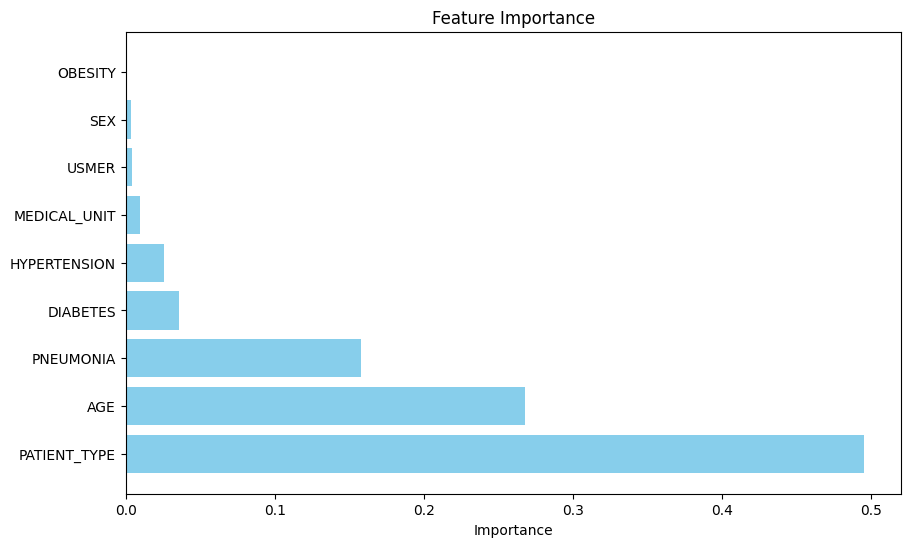

In [66]:
# Extract feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature names and their importances
for feature, importance in zip(features.columns, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


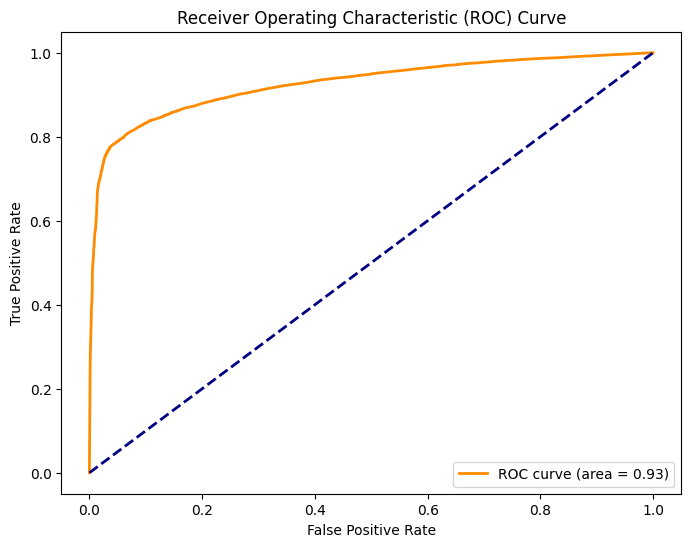

'\nFindings:\nThe ROC Curve exhibits a convex shape, resembling an upward curve with an area under the curve (AUC) value of 0.93.\nThis AUC value indicates a high level of discrimination capacity for the model, as it represents the probability that the model\nwill rank a randomly chosen positive instance higher than a randomly chosen negative instance.\n'

In [69]:
# ROC Curve and AUC Calculation:
# Calculate the Receiver Operating Characteristic (ROC) curve and the area under the curve (AUC) for evaluating model performance.

# Convert labels to binary
y_binary = (y_test == 1).astype(int)

# Calculate the probability estimates for the positive class
y_prob = random_forest_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Plot convex ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Show the plot
plt.show()

"""
Findings:
The ROC Curve is concave, with an area under the curve (AUC) value of 0.93.
This AUC value indicates a strong discrimination capacity for the model, meaning
it's good at distinguishin positive and negative instances.
"""


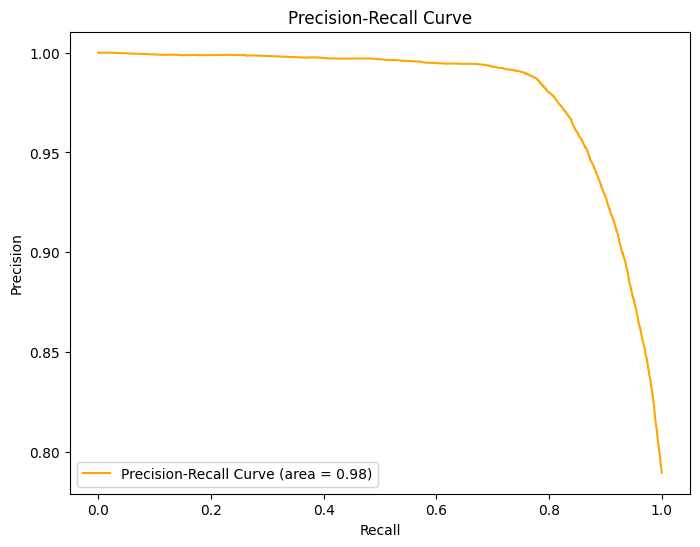

"\nFindings:\nThe concave Precision-Recall Curve reflects strong model performance, with an impressive AUC value of 0.98. \nThis high AUC indicates excellent precision and recall trade-off, demonstrating the model's effectiveness in \ndistinguishing between positive and negative instances.\n"

In [71]:
# Precision Recall Curve
precision, recall, _ = precision_recall_curve(y_test.replace({2: 0}), y_prob)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='orange', label=f'Precision-Recall Curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

"""
Findings:
The concave Precision-Recall Curve reflects strong model performance, with an impressive AUC value of 0.98.
This high AUC indicates excellent precision and recall trade-off, demonstrating the model's effectiveness in
distinguishing between positive and negative instances.
"""